In [ ]:
# # Import and creating some helper functions
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import copy
# from tensorflow.keras import layers
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.models import Model


# def preprocess(array):
#     """
#     Normalizes the supplied array and reshapes it into the appropriate format.
#     """

#     array = array.astype("float32") / 255.0
#     array = np.reshape(array, (len(array), 28, 28, 1))
#     return array


# def occlude(array):
#     """
#     Adds occlusion.
#     """
#     new_array = copy.deepcopy( array )
#     print(new_array.shape)
#     new_array[:,10:13,:] = 1.0

#     return new_array


# def display(array1, array2):
#     """
#     Displays ten random images from each one of the supplied arrays.
#     """

#     n = 10

#     indices = np.random.randint(len(array1), size=n)
#     images1 = array1[indices, :]
#     images2 = array2[indices, :]

#     plt.figure(figsize=(20, 4))
#     for i, (image1, image2) in enumerate(zip(images1, images2)):
#         ax = plt.subplot(2, n, i + 1)
#         plt.imshow(image1.reshape(28, 28))
#         plt.gray()
#         ax.get_xaxis().set_visible(False)
#         ax.get_yaxis().set_visible(False)

#         ax = plt.subplot(2, n, i + 1 + n)
#         plt.imshow(image2.reshape(28, 28))
#         plt.gray()
#         ax.get_xaxis().set_visible(False)
#         ax.get_yaxis().set_visible(False)

#     plt.show()



# # Since we only need images from the dataset to encode and decode, we
# # won't use the labels.
# (train_data, _), (test_data, _) = mnist.load_data()

# # Normalize and reshape the data
# train_data = preprocess(train_data)
# test_data = preprocess(test_data)

# # Create a copy of the data with added noise
# noisy_train_data = occlude(train_data)
# noisy_test_data = occlude(test_data)

# # Display the train data and a version of it with added noise
# display(train_data, noisy_train_data)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import copy
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def preprocess(array):
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

def occlude(array):
    new_array = copy.deepcopy(array)
    new_array[:, 10:13, :] = 1.0
    return new_array

def display(array1, array2, array3, labels=['Actual', 'Occluded', 'Reconstructed']):
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]
    images3 = array3[indices, :]

    plt.figure(figsize=(20, 8))
    for i, (image1, image2, image3) in enumerate(zip(images1, images2, images3)):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title(labels[0])

        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title(labels[1])

        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(image3.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title(labels[2])

    plt.show()

# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = occlude(train_data)
noisy_test_data = occlude(test_data)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest'
)

# (train_data, _), (test_data, _) = mnist.load_data()

# # Normalize and reshape the data
# train_data = preprocess(train_data)
# test_data = preprocess(test_data)

# # Create a copy of the data with added noise
# noisy_train_data = occlude(train_data)
# noisy_test_data = occlude(test_data)

# # Define the autoencoder model
# input_img = layers.Input(shape=(28, 28, 1))
# encoded = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
# encoded = layers.MaxPooling2D((2, 2), padding='same')(encoded)
# encoded = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
# encoded = layers.MaxPooling2D((2, 2), padding='same')(encoded)

# decoded = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
# decoded = layers.UpSampling2D((2, 2))(decoded)
# decoded = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
# decoded = layers.UpSampling2D((2, 2))(decoded)
# decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

# autoencoder = Model(input_img, decoded)
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# # Train the autoencoder on clean images
# autoencoder.fit(train_data, train_data, epochs=10, batch_size=128, shuffle=True, validation_data=(test_data, test_data))

In [ ]:
# Define the autoencoder model
# input_img = layers.Input(shape=(28, 28, 1))
# encoded = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
# encoded = layers.MaxPooling2D((2, 2), padding='same')(encoded)
# encoded = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
# encoded = layers.MaxPooling2D((2, 2), padding='same')(encoded)

# decoded = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
# decoded = layers.UpSampling2D((2, 2))(decoded)
# decoded = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
# decoded = layers.UpSampling2D((2, 2))(decoded)
# decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

# Define the autoencoder model with Batch Normalization and Dropout
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

# Adding Dropout for regularization
x = layers.Dropout(0.25)(x)

encoded = layers.Flatten()(x)
decoded = layers.Reshape((7, 7, 64))(encoded)

decoded = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(decoded)
decoded = layers.UpSampling2D((2, 2))(decoded)
decoded = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoded)
decoded = layers.UpSampling2D((2, 2))(decoded)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = Model(input_img, decoded)
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
# autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy')
autoencoder.compile(optimizer=sgd_optimizer, loss='binary_crossentropy')

# Implement early stopping and learning rate reduction
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

# Train the autoencoder on clean images with data augmentation
history = autoencoder.fit(
    datagen.flow(train_data, train_data, batch_size=128),
    epochs=2000,
    steps_per_epoch=len(train_data) // 128,
    validation_data=(test_data, test_data),
    callbacks=[early_stopping, reduce_lr]
)

# Save only the model weights
autoencoder.save_weights('autoencoder_weights.h5')

Epoch 1/2000
468/468 [==============================] - 24s 40ms/step - loss: 0.2424 - val_loss: 0.1863 - lr: 0.0100
Epoch 2/2000
468/468 [==============================] - 18s 38ms/step - loss: 0.2181 - val_loss: 0.1754 - lr: 0.0100
Epoch 3/2000
468/468 [==============================] - 18s 38ms/step - loss: 0.2131 - val_loss: 0.1713 - lr: 0.0100
Epoch 4/2000
468/468 [==============================] - 18s 38ms/step - loss: 0.2101 - val_loss: 0.1706 - lr: 0.0100
Epoch 5/2000
468/468 [==============================] - 18s 38ms/step - loss: 0.2081 - val_loss: 0.1677 - lr: 0.0100
Epoch 6/2000
468/468 [==============================] - 18s 38ms/step - loss: 0.2062 - val_loss: 0.1678 - lr: 0.0100
Epoch 7/2000
468/468 [==============================] - 18s 38ms/step - loss: 0.2043 - val_loss: 0.1696 - lr: 0.0100
Epoch 8/2000
468/468 [==============================] - 18s 38ms/step - loss: 0.2028 - val_loss: 0.1656 - lr: 0.0020
Epoch 9/2000
468/468 [==============================] - 18s 38ms

313/313 [==============================] - 1s 2ms/step


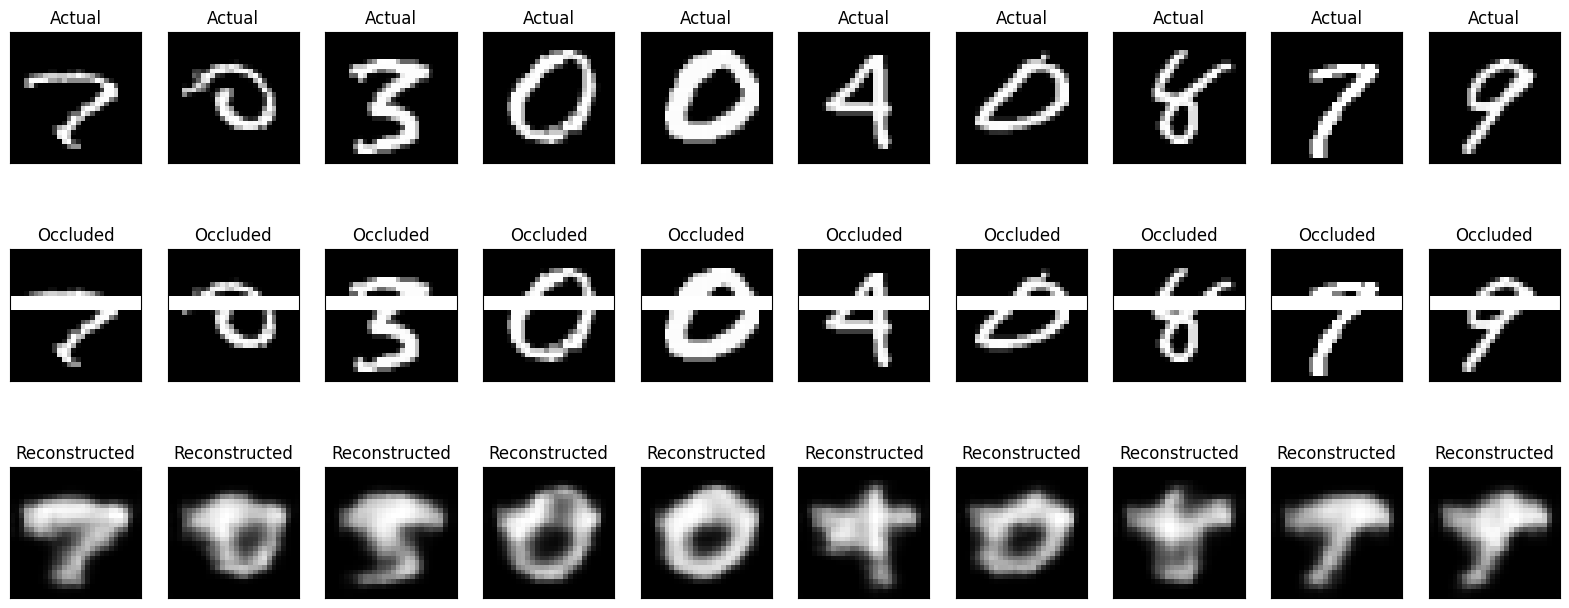

In [ ]:
# Use the trained autoencoder to reconstruct the occluded images
decoded_images = autoencoder.predict(noisy_test_data)

# Display the original, occluded, and reconstructed images with labels
display(test_data, noisy_test_data, decoded_images, labels=['Actual', 'Occluded', 'Reconstructed'])